In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('sample_submission.csv')

In [3]:
# Checking the shapes of the all the datas
train_data.shape, test.shape, ss.shape

((1460, 81), (1459, 80), (1459, 2))

In [4]:
# checking the information of the given training data (the data types and each columns counts). three major data types where identified int64,float and Object
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

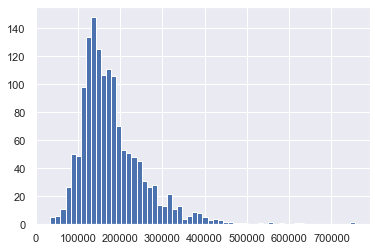

In [5]:
train_data['SalePrice'].hist(bins=60)

## Dealing with Outlier in the Targets

In [6]:
q = train_data['SalePrice'].quantile(.995)

In [7]:
train = train_data[train_data['SalePrice']<q] 

In [8]:
train.shape

(1452, 81)

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

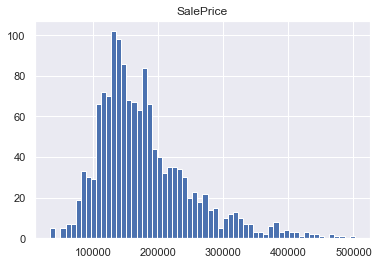

In [9]:
train[[ 'SalePrice']].hist(bins=60)

## Combining Training and testing data 

In [10]:
train.shape, test.shape

((1452, 81), (1459, 80))

In [11]:
train['SalePrice'].isnull().sum()

0

In [12]:
train1 = train.drop(['SalePrice'],axis=1)

In [13]:
combine_data = pd.concat([train1,test], ignore_index = True)

In [14]:
combine_data.shape

(2911, 80)

## Checking for Missing Values

In [15]:
combine_data.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          2902
MiscFeature     2806
Alley           2713
Fence           2341
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
dtype: int64

In [16]:
import missingno

<AxesSubplot:>

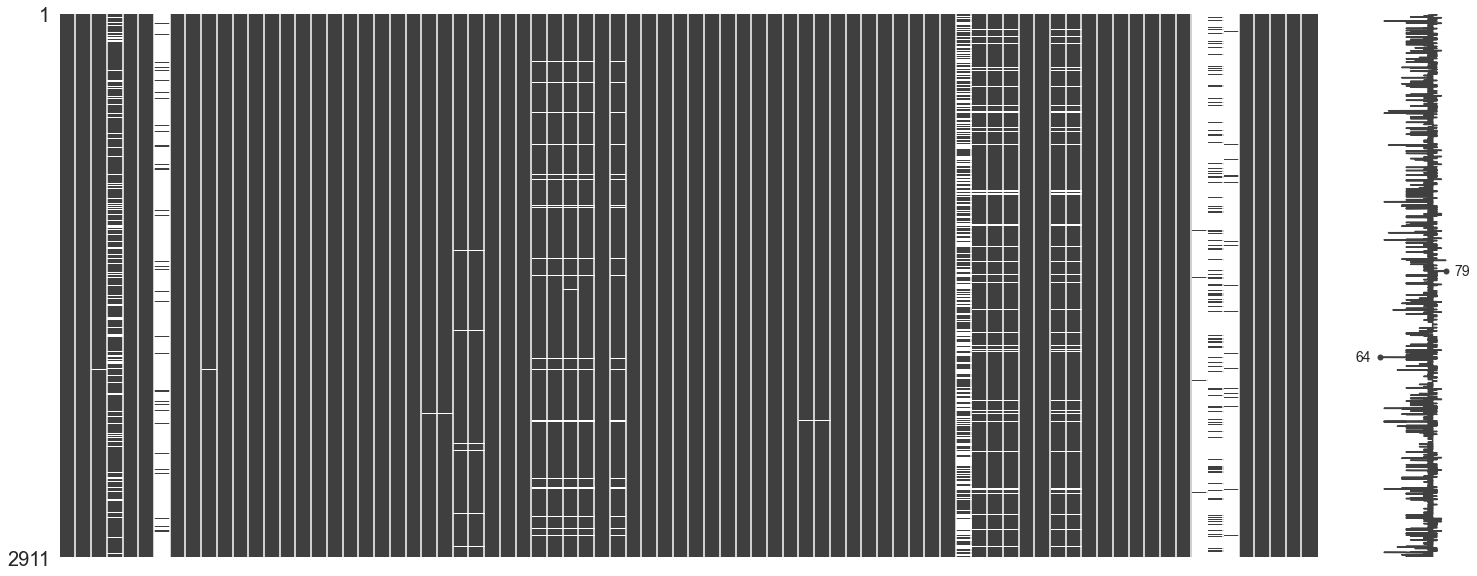

In [17]:
missingno.matrix(combine_data)

### Analyzing and fixing some large and significant missing values 

In [18]:
combine_data_miss = combine_data.copy() 

In [36]:
missing = combine_data_miss.isnull().sum().sort_values(ascending=False)
missing.head(10)

PoolQC          2902
MiscFeature     2806
Alley           2713
Fence           2341
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
dtype: int64

In [37]:
combine_data_miss['PoolQC'].value_counts()

Gd    4
Ex    3
Fa    2
Name: PoolQC, dtype: int64

In [38]:
combine_data_miss['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

# DEALING WITH MISSING VALUES 

In [ ]:
def remove_large_miss():
    for x in combine_data.columns:
        removed_columns = []
        if combine_data[x].isnull().sum()>(combine_data.shape[0]/10):
            combine_data.drop(x,axis=1, inplace=True)
            removed_columns.append(x)
            print(removed_columns)
    

In [ ]:
remove_large_miss()

In [ ]:
combine_data.shape

In [ ]:
def fillna_int_float():
    for x in combine_data.columns:
        filled_int_float = []
        filled_obj = []
        if ((combine_data[x].dtype =='int64')|(combine_data[x].dtype =='float64'))==True :
            combine_data.fillna(combine_data[x].mean(), inplace=True)
            filled_int_float.append(x)
            print('Int_Float',filled_int_float)
        else:
            combine_data.fillna(combine_data[x].mode()[0], inplace=True)
            filled_obj.append(x)
            print('Object', filled_obj)

In [ ]:
combine_data['LotArea'].mode()[0]

In [ ]:
fillna_int_float()

In [ ]:
missingno.matrix(combine_data)

In [ ]:
combine_data.shape

# DEALING WITH CATEGORICAL VARIABLES 

In [ ]:
combine = combine_data.copy()

In [14]:
# this function will show all the categorical variables in the dataframe
for x in combine.columns:
    if (combine[x].dtype=='O')==True:
        #combine[x].value_counts()
        print(x)

NameError: name 'combine' is not defined

In [ ]:
categorical_var_list = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [ ]:
combine.head(3)

# Creating Dummies for Categorical Data 


In [ ]:
combine_with_dum = pd.get_dummies(combine, columns=categorical_var_list, drop_first=True)

In [ ]:
combine_with_dum.head()

In [ ]:
combine_with_dum.shape

# Seperating Dummies and non_dumies

In [ ]:
non_dummies = combine.drop(categorical_var_list, axis = 1)

In [ ]:
non_dummies.columns

In [ ]:
list_of_num_var = ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

In [ ]:
only_dummies = combine_with_dum.drop(list_of_num_var, axis=1)

In [ ]:
non_dummies.head()

In [ ]:
only_dummies.head()

# Automating band creation
All values will be categorised by intervals 

In [ ]:
non_dummies = combine.drop(categorical_var_list, axis = 1)

In [ ]:
no_dummies = non_dummies.copy()

In [ ]:
no_dummies.drop('Id',axis=1,inplace=True)

In [ ]:
no_dummies.head()

In [ ]:
# this function cut all inputs x into interval replacing their lebels with preffix y and then dropping the columns x after creating the interval
def band_creator(x,y):
    no_dummies[y] = pd.cut(no_dummies[x],4)
    no_dummies.drop(x,axis=1, inplace=True)
    #return no_dummies[y].value_counts()

In [ ]:
# Taking each col we perform the operation as described in the function above
for x in no_dummies.columns:
    done = []
    y = x[:3]
    band_creator(x,y)
    done.append(y)
    #print(done)

In [ ]:
no_dummies.head()

In [ ]:
no_dummies.shape

# Encoding the new data (coverting the to Dummy variable)

In [ ]:
dummies_new = pd.get_dummies(no_dummies,drop_first=True)

In [ ]:
dummies_new.head()

# combining all the dummies again

In [ ]:
final_data = pd.concat([dummies_new,only_dummies],axis=1)

In [ ]:
dummies_new.shape

In [ ]:
final_data.head()

In [ ]:
totrain = final_data[:1452]
totest = final_data[1452:]
totrain.shape, totest.shape

In [ ]:
totrain = pd.concat([totrain,train['SalePrice']],axis=1)

In [ ]:
totrain.to_csv('preprocessed/training.csv', index=False)
totest.to_csv('preprocessed/testing.csv', index=False)

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
#this step calculate the mean and standard Deviation of the Data while
scaler.fit(combine_with_dum)

In [ ]:
#this step Does the trandormation or strandadization
scaled_input = scaler.transform(combine_with_dum)

In [ ]:
scaled_input

In [ ]:
scaled_input.head()